# **Real Estate Price Prediction** **using Linear Regression**

The Real Estate Price Prediction project involves building a machine learning model to predict property prices based on various features such as location, size, number of bedrooms, bathrooms, and other relevant attributes. This project provides You with practical exposure to data preprocessing, feature engineering, and regression model building, making it an excellent assignment to understand real-world data science applications.

**Problem Statement**

**Objective:**
The goal of this project is to develop a predictive model that accurately estimates the price of a real estate property based on its features.

**Scenario:**
A real estate company is looking to implement an automated pricing system for properties to assist buyers and sellers in determining fair market prices. The company has collected historical data on property prices and features and wants to leverage this data to build a machine learning model.

**Key Questions to Address:**
1.	How can we preprocess the raw data to make it suitable for modeling?
2.	What are the key features that influence real estate prices?
**Deliverables:**

•	Exploratory Data Analysis (EDA) to understand the data distribution and relationships.

•	Data preprocessing steps, including handling missing values, encoding categorical variables, and feature scaling.

•	Insights on the most important factors affecting property prices.
•	A trained regression model (Use only Linear Regression) with performance evaluation metrics such as RMSE or R².

This project equips you with a comprehensive understanding of the workflow involved in building regression models while exposing them to real-world applications in the real estate domain.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_csv("/content/Real_Estate.csv")
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%            

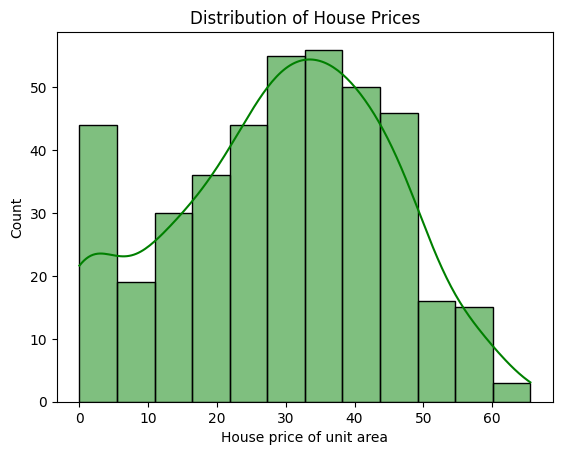

In [ ]:
sns.histplot(data['House price of unit area'], kde=True, color='green')
plt.title("Distribution of House Prices")
plt.show()

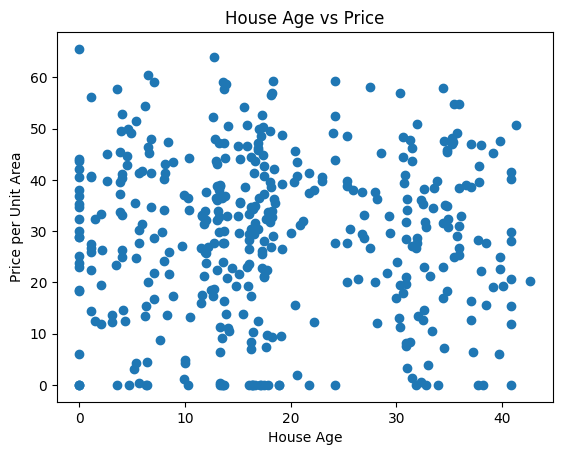

In [ ]:
plt.scatter(data['House age'], data['House price of unit area'])
plt.title("House Age vs Price")
plt.xlabel("House Age")
plt.ylabel("Price per Unit Area")
plt.show()

In [ ]:
data.fillna(method='ffill', inplace=True)

<ipython-input-9-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
X = data[['House age', 'Distance to the nearest MRT station',
          'Number of convenience stores', 'Latitude', 'Longitude']]
y = data['House price of unit area']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (331, 5)
Testing Set Shape: (83, 5)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.25074957e-03 -8.35130068e-03  1.81682766e+00  6.43423914e+01
 -3.61575541e+01]
Intercept: 2816.9953064543456


In [ ]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


        Actual  Predicted
358  35.762667  38.579676
350  31.743662  30.276098
373  27.786894  30.614852
399  54.831664  45.387010
369  39.416482  23.221794


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 11.162843441979836
R-squared (R²): 0.5495657614291141


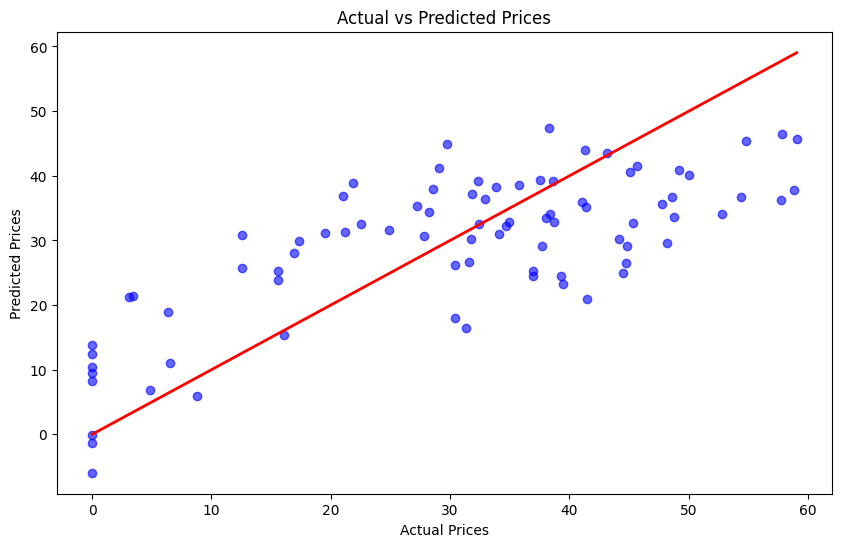

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()